In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy
import re
import scipy.stats as stats

import sys
sys.path.insert(0, r'/Users/Student/OneDrive/MSci project/MSci2022_TESS/packages')
from parameters_reading import read_df_params

In [2]:
#NASA Exoplanet Archieve of HAT_P_30b
# https://exoplanetarchive.ipac.caltech.edu/overview/HAT-P-30b

#Binary system
# HAT_P_30 - Star
#  Hosts HAT_P_30b
#  
# HAT_P_30B - Star

In [3]:
df = pd.read_csv("HAT_P_30b_literature.csv")#, header=None)
df = df.set_index('Parameter')


In [4]:
df

,Stassun et al. 2017,Ivshina & Winn 2022,Kokori et al. 2022,Bonomo et al. 2017,Maciejewski et al. 2016,Knutson et al. 2014,Johnson et al. 2011,ExoFOP-TESS TOI
Parameter,,,,,,,,
a/R*,7.43+/-0.34,---,---,---,6.771+0.013-0.012,---,7.42+/-0.26,---
e,0.04+/-0.02,---,---,<0.016,---,0.020+0.022-0.014,0.035+/-0.024,---
i,83.60+/-0.04,---,---,83.600+/-0.040,82.70+/-0.19,---,83.6+/-0.4,---
P,2.810600+/-0.000005,2.81060126+/-0.00000060,2.8106016+/-0.0000005,2.8105950+/-0.0000050,2.8106084+/-0.0000011,---,2.810595+/-0.000005,2.81060009934672+/-0.00000086293700
R,1.44+/-0.15,---,---,1.340+/-0.065,1.469+0.039-0.037,---,1.340+/-0.065,1.42546199350888+/-0.07278863456336
RpRs,---,---,---,---,0.1109+0.0016-0.0014,---,0.1134+/-0.0020,---
a,---,---,---,0.04190+/-0.00046,0.04190+/-0.00046,---,0.0419+/-0.0005,---
w,---,---,---,---,---,114+200-77,252+/-84,---
colour,#1f77b4,#ff7f0e,#2ca02c,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f


In [5]:
df_ref_list = df.columns

# df_e_list = df.loc['e'] #Eccentricty row
df_i_list = df.loc['i'] #Orbtial inclination row
df_P_list = df.loc['P'] #Orbtial period row
df_R_list = df.loc['R'] #Planetary radius row
df_a_list = df.loc['a'] #Semi-major axis row
# df_b_list = df.loc['b'] #Impact parameter row
df_RpRs_list = df.loc['RpRs'] #R_p/R_star row
# df_w_list = df.loc['w'] #
df_color = df.loc['colour'] #Colours
# df_T_c_list = df.loc['T_c']
# df_transit_duration_list = df.loc['transit_duration']
df_a_Rs_list = df.loc['a/R*']

# e_list, e_ref_list = read_df_params(df_e_list, df_ref_list)
i_list, i_ref_list = read_df_params(df_i_list, df_ref_list)
P_list, P_ref_list = read_df_params(df_P_list, df_ref_list)
R_list, R_ref_list = read_df_params(df_R_list, df_ref_list)
a_list, a_ref_list = read_df_params(df_a_list, df_ref_list)
# b_list, b_ref_list = read_df_params(df_b_list, df_ref_list)
RpRs_list, RpRs_ref_list = read_df_params(df_RpRs_list, df_ref_list)
# T_c_list, T_c_ref_list = read_df_params(df_T_c_list, df_ref_list)
# transit_duration_list, transit_duration_ref_list = read_df_params(df_transit_duration_list, df_ref_list)
a_Rs_list, a_Rs_ref_list = read_df_params(df_a_Rs_list, df_ref_list)

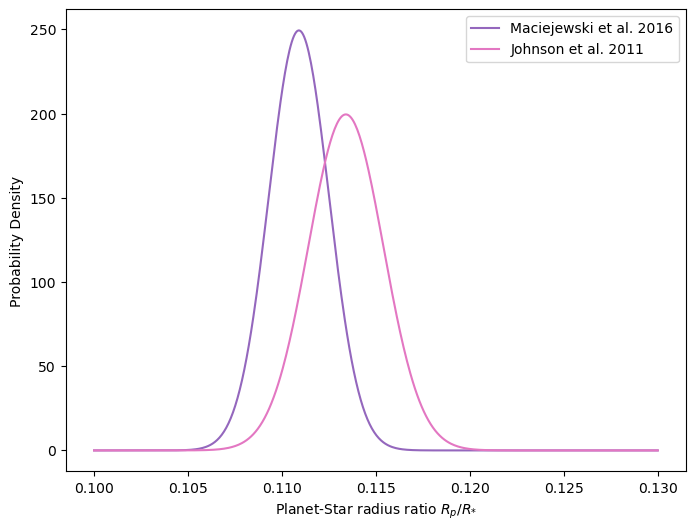

In [6]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.10, 0.13, 500)
for RpRs_obj, author in zip(RpRs_list, RpRs_ref_list):
    mu, upper, lower = RpRs_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planet-Star radius ratio $R_{p}/R_{*}$')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

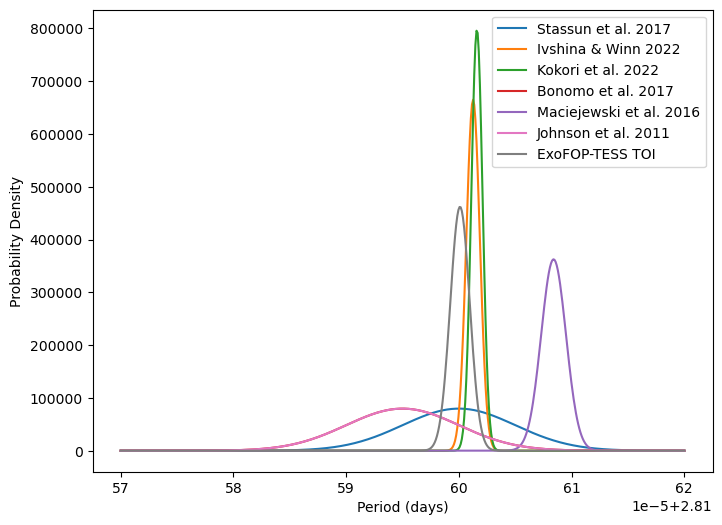

In [7]:
fig, ax = plt.subplots(1, figsize=(8,6))

# x = np.linspace(4.055276, 4.055283, 500)
x = np.linspace(2.81057, 2.81062, 500)
for P_obj, author in zip(P_list, P_ref_list):
    mu, upper, lower = P_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel("Period (days)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

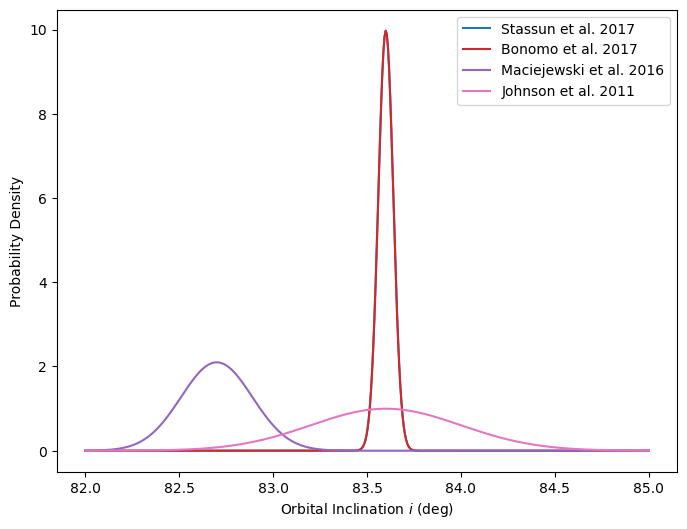

In [8]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(82, 85, 500)
for i_obj, author in zip(i_list, i_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"Orbital Inclination $i$ (deg)")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

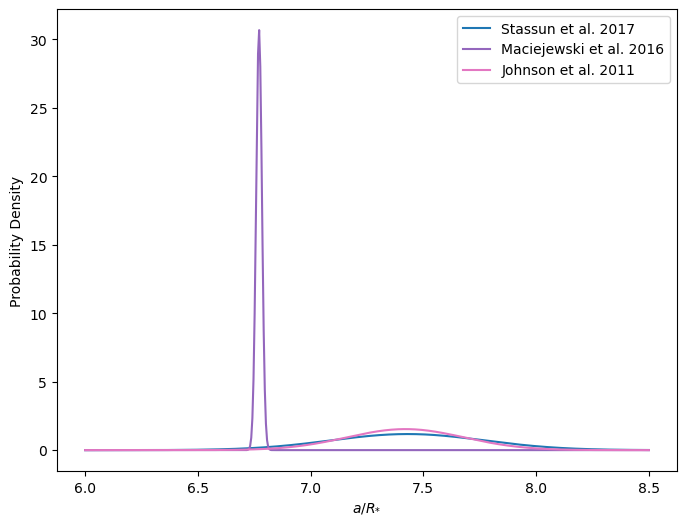

In [9]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(6, 8.5, 500)
for i_obj, author in zip(a_Rs_list, a_Rs_ref_list):
    mu, upper, lower = i_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r"$a/R_{*}$")
plt.ylabel("Probability Density")
ax.legend()
plt.show()

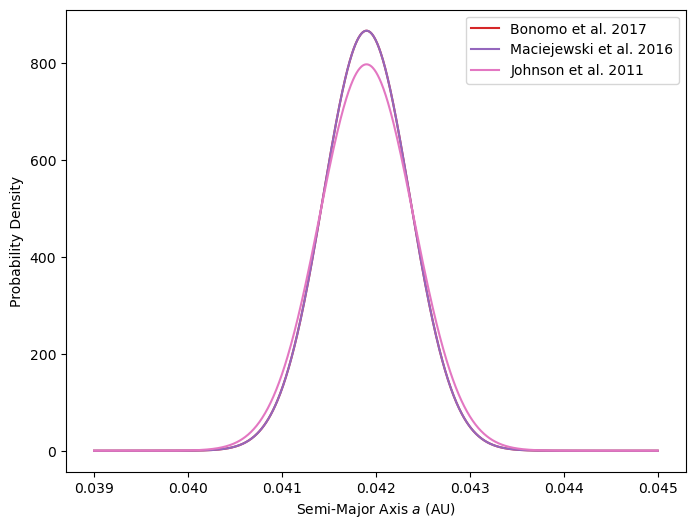

In [10]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.039, 0.045, 1000)
for a_obj, author in zip(a_list, a_ref_list):
    mu, upper, lower = a_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Semi-Major Axis $a$ (AU)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()

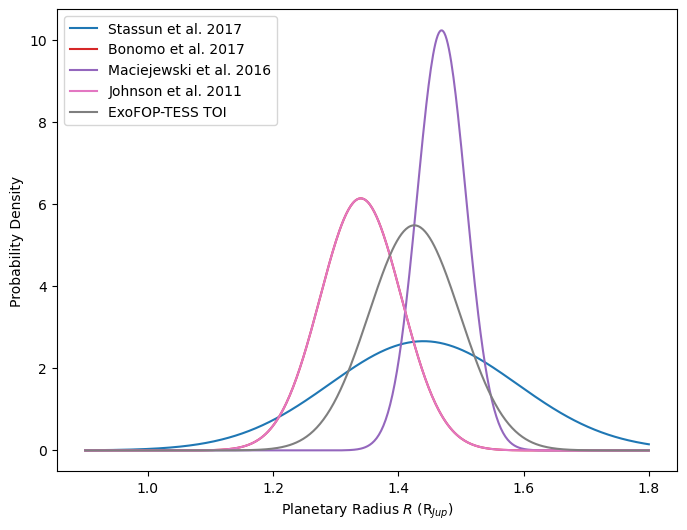

In [11]:
fig, ax = plt.subplots(1, figsize=(8,6))

x = np.linspace(0.9, 1.8, 500)
for R_obj, author in zip(R_list, R_ref_list):
    mu, upper, lower = R_obj
    sigma = max(abs(upper), abs(lower))
    if sigma > 0:
        colour = df[author]['colour']
        plt.plot(x, stats.norm.pdf(x, mu, sigma), label=author, color=colour)

plt.xlabel(r'Planetary Radius $R$ (R$_{Jup}$)')
plt.ylabel("Probability Density")
ax.legend()
plt.show()